In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/raw/twitter_human_bots_dataset.csv', index_col=0)

Univariate Analysis

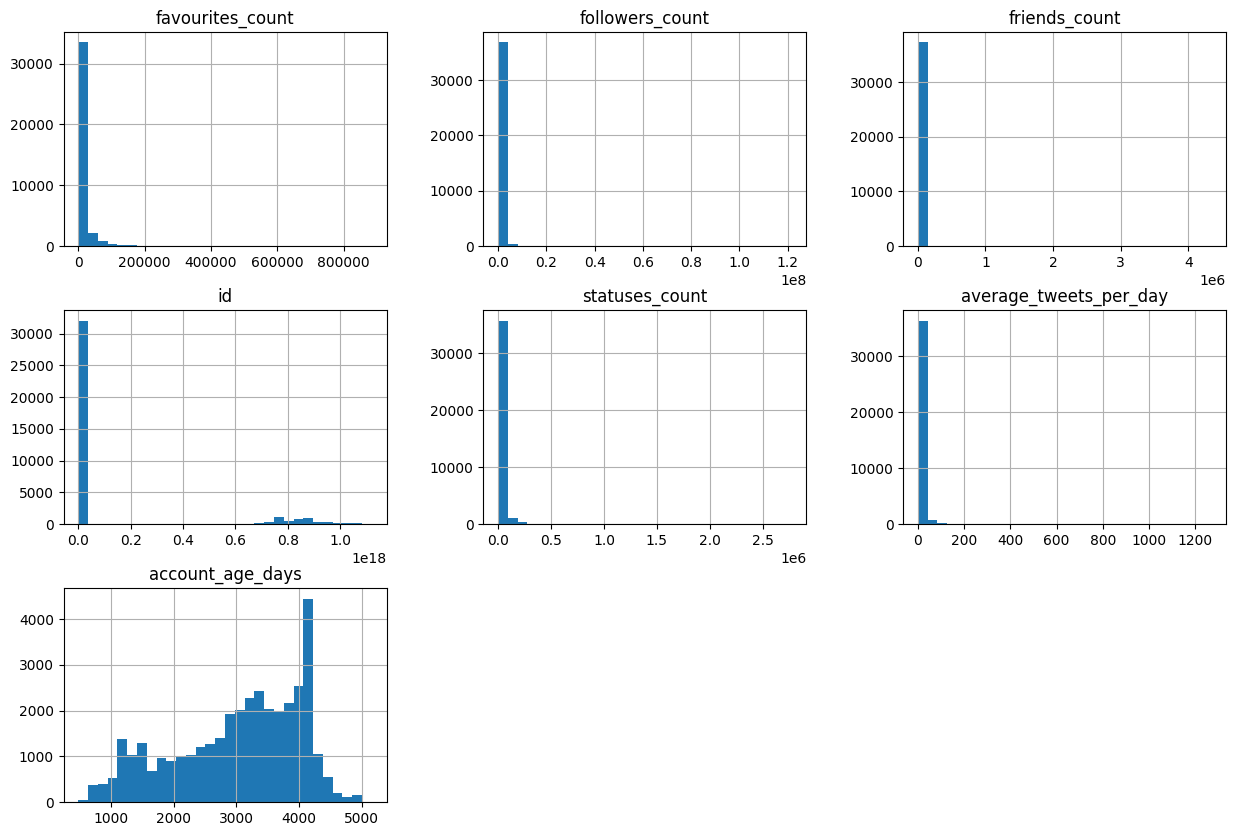

created_at
2012-11-21 02:56:00    0.000053
2015-11-03 09:51:18    0.000053
2015-11-03 09:18:18    0.000053
2009-04-20 18:36:09    0.000053
2010-08-10 09:42:04    0.000053
Name: proportion, dtype: float64
description
.                    0.000464
Actor                0.000431
#BlackLivesMatter    0.000364
hi                   0.000232
:)                   0.000232
Name: proportion, dtype: float64
lang
en    0.727587
es    0.041145
pt    0.023880
it    0.021607
ar    0.020149
Name: proportion, dtype: float64
location
unknown            0.347892
Los Angeles, CA    0.013998
New York, NY       0.009056
United States      0.006385
Washington, DC     0.005984
Name: proportion, dtype: float64
profile_background_image_url
http://abs.twimg.com/images/themes/theme1/bg.png     0.662346
http://abs.twimg.com/images/themes/theme14/bg.gif    0.070160
http://abs.twimg.com/images/themes/theme9/bg.gif     0.049728
http://abs.twimg.com/images/themes/theme10/bg.gif    0.028659
http://abs.twimg.com/images/t

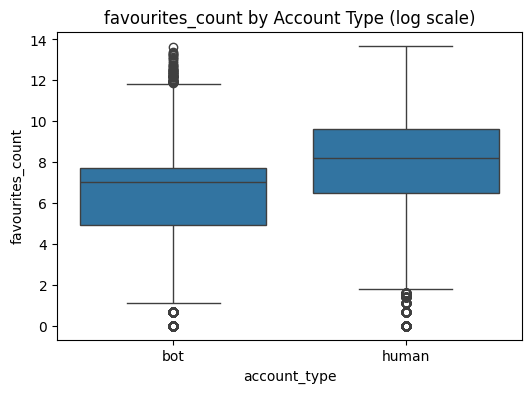

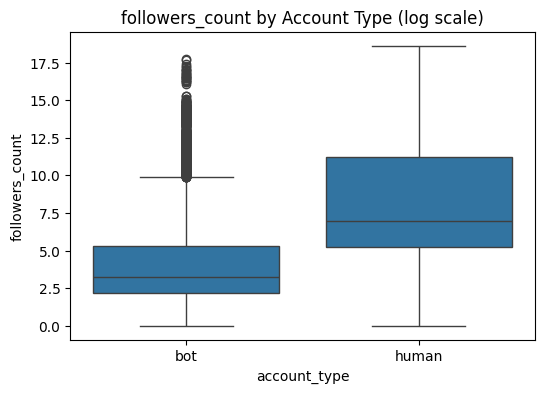

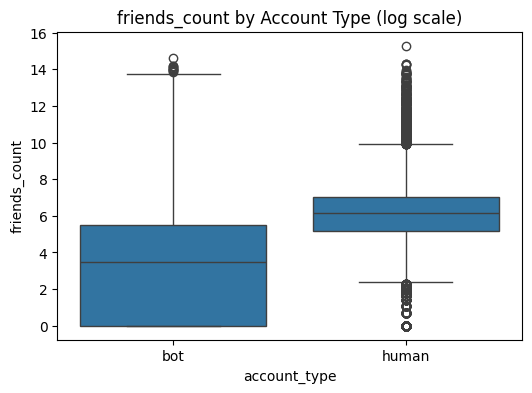

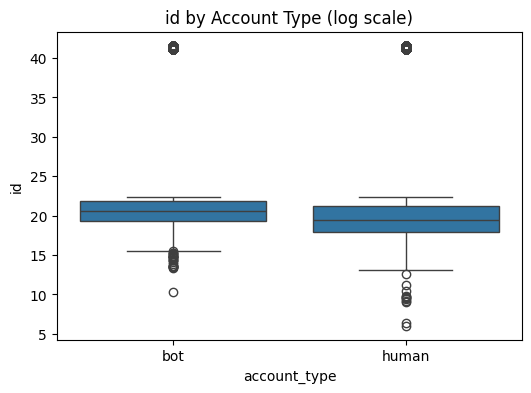

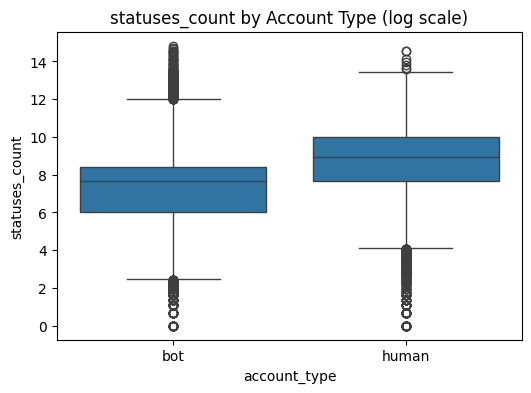

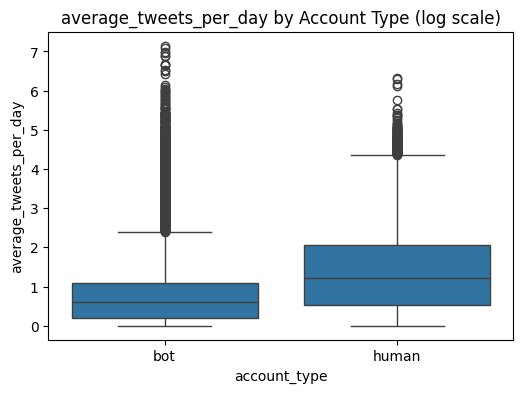

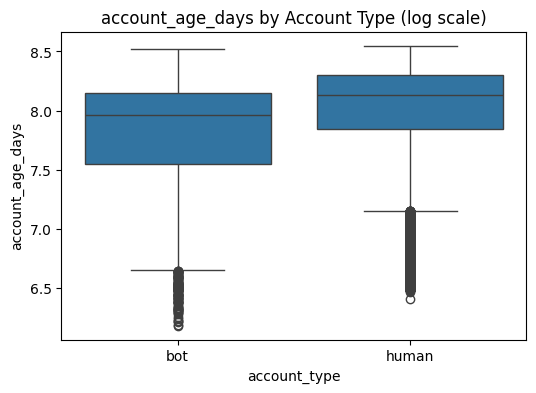

In [43]:
num_cols = df.select_dtypes(include=['float64','int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

df[num_cols].hist(bins=30, figsize=(15,10))
plt.show()

for col in cat_cols:
    print(df[col].value_counts(normalize=True).head())

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='account_type', y=np.log1p(df[col]), data=df)
    plt.title(f'{col} by Account Type (log scale)')
    plt.show()

Hypothesis: Higher Follower-Friend ratio is more likely to be a bot

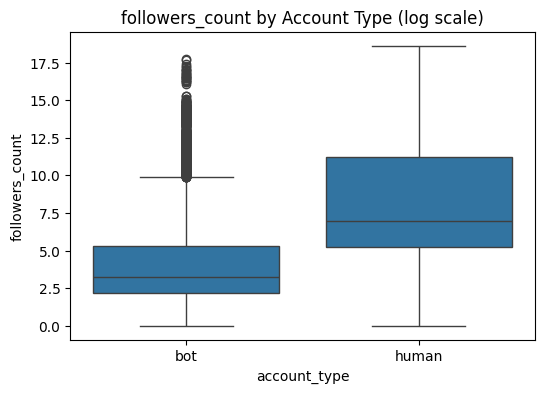

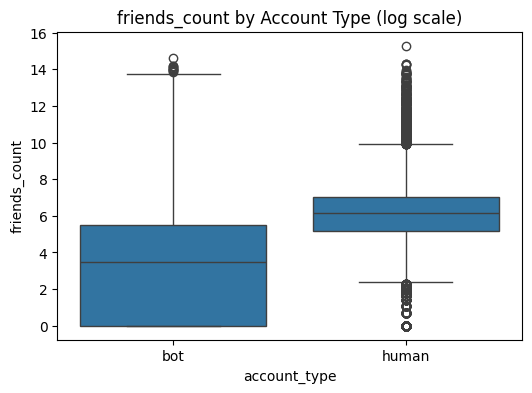

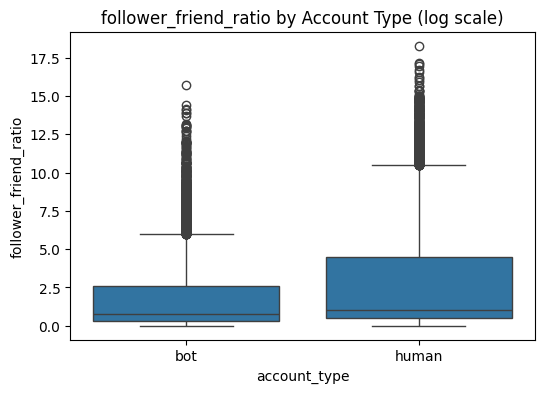

count    1.242500e+04
mean     2.057943e+03
std      6.961455e+04
min      1.398601e-03
25%      3.333333e-01
50%      1.120107e+00
75%      1.200000e+01
max      6.903234e+06
Name: follower_friend_ratio, dtype: float64
count    2.501300e+04
mean     2.054614e+04
std      6.648711e+05
min      2.659574e-03
25%      6.889952e-01
50%      1.750572e+00
75%      9.016600e+01
max      8.699048e+07
Name: follower_friend_ratio, dtype: float64
t-test: TtestResult(statistic=np.float64(-4.350105443853602), pvalue=np.float64(1.365879170790578e-05), df=np.float64(26102.59703142663))
Mann–Whitney: MannwhitneyuResult(statistic=np.float64(125154548.0), pvalue=np.float64(4.298753605943666e-207))


In [37]:
df['in_degree'] = df['followers_count']
df['out_degree'] = df['friends_count']

# Basic ratios
df['follower_friend_ratio'] = (df['followers_count'] + 1) / (df['friends_count'] + 1)
df['activity_ratio'] = df['statuses_count'] / (df['followers_count'] + 1)
df['normalized_degree'] = (df['followers_count'] + df['friends_count']) / (df['followers_count'] + df['friends_count']).max()

metrics = ['followers_count', 'friends_count', 'follower_friend_ratio']

for m in metrics:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='account_type', y=np.log1p(df[m]), data=df)
    plt.title(f'{m} by Account Type (log scale)')
    plt.show()

bots = df[df['account_type']=='bot']['follower_friend_ratio']
humans = df[df['account_type']=='human']['follower_friend_ratio']

print(bots.describe())
print(humans.describe())

from scipy.stats import ttest_ind, mannwhitneyu
print("t-test:", ttest_ind(bots, humans, equal_var=False))
print("Mann–Whitney:", mannwhitneyu(bots, humans, alternative='two-sided'))